<a href="https://colab.research.google.com/github/ltpdo/GradeData-MachineLearing/blob/machine-learning1/%E6%88%90%E7%B8%BE%E3%83%87%E3%83%BC%E3%82%BF%E3%81%AE%E4%BB%95%E5%88%86%E3%81%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ライブラリのインポート

In [1]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import seaborn as sns

# グラフの日本語化
!pip install japanize_matplotlib
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 27.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=c0d632c503ab6b15fef3b5f8a1fba74962c9ea88c09f36b7c94000b5cfa33d35
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [2]:
# 機械学習用のライブラリ
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# 成績データの読み込み

In [3]:
# Google Driveとの接続
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/卒論/成績データ/')

Mounted at /content/drive


In [4]:
# 履修成績データの読み込み
subject_2015 = pd.read_excel("履修成績データ2015.xlsx")
subject_2016 = pd.read_excel("履修成績データ2016.xlsx")
subject_2021 = pd.read_excel("履修成績データ2021.xlsx")
subject_2022 = pd.read_excel("履修成績データ2022.xlsx")

subject_2015.head()

,学生番号,年度,学期,科目名,単位数,成績,GP
0,15001,2018,通年,卒業研究,8,S,4
1,15001,2017,前期,オブジェクト指向設計,2,A,3
2,15001,2017,前期,情報回路Ⅲ,2,S,4
3,15001,2017,前期,コンピュータネットワーク,2,A,3
4,15001,2017,前期,グラフィックスプログラミング演習,2,S,4


# 成績データの前処理

## データの前処理

In [5]:
# 列を削除
subject_2015 = subject_2015.drop(["年度", "学期", "単位数", "成績"], axis = 1)
subject_2016 = subject_2016.drop(["年度", "学期", "単位数", "成績"], axis = 1)
subject_2021 = subject_2021.drop(["年度", "学期", "単位数", "成績"], axis = 1)
subject_2022 = subject_2022.drop(["年度", "学期", "単位数", "成績"], axis = 1)

subject_2021.head()

,学生番号,科目名,GP
0,21001,ゲームプログラミング演習,4
1,21001,Reading & WritingⅢ,3
2,21001,Listening & SpeakingⅢ,3
3,21001,韓国語Ⅰ,4
4,21001,計算機構成論Ⅱ,4


In [6]:
# 欠損値の確認
print(subject_2015.isna().sum())
print(subject_2016.isna().sum())
print(subject_2021.isna().sum())
print(subject_2022.isna().sum())

学生番号    0
科目名     0
GP      0
dtype: int64
学生番号    0
科目名     0
GP      0
dtype: int64
学生番号    0
科目名     0
GP      0
dtype: int64
学生番号    0
科目名     0
GP      0
dtype: int64


In [7]:
# 型の確認
print(subject_2015.dtypes)
print(subject_2016.dtypes)
print(subject_2021.dtypes)
print(subject_2022.dtypes)

学生番号     int64
科目名     object
GP       int64
dtype: object
学生番号     int64
科目名     object
GP       int64
dtype: object
学生番号     int64
科目名     object
GP       int64
dtype: object
学生番号     int64
科目名     object
GP       int64
dtype: object


In [8]:
# 学生番号を行に、科目名を列に、値をGPに
subject_2015 = subject_2015.pivot_table(values = "GP", index = "学生番号", columns = "科目名")
subject_2016 = subject_2016.pivot_table(values = "GP", index = "学生番号", columns = "科目名")
subject_2021 = subject_2021.pivot_table(values = "GP", index = "学生番号", columns = "科目名")
subject_2022 = subject_2022.pivot_table(values = "GP", index = "学生番号", columns = "科目名")
subject_2015.head()

科目名,English Expressions,Four SkillsⅠ,Four SkillsⅡ,Labo TrainingⅠ,Labo TrainingⅡ,Listening & SpeakingⅠ,Listening & SpeakingⅡ,Listening & SpeakingⅢ,Listening & SpeakingⅣ,Listening & SpeakingⅥ,...,離散数学Ⅱ,韓国語Ⅰ,韓国語Ⅱ,韓国語会話Ⅰ,韓国語会話Ⅱ,音声・画像／処理・理解,音楽概論,ｺﾝﾋﾟｭｰﾀｸﾞﾗﾌｨｯｸｽ基礎,ｺﾝﾋﾟｭｰﾀｸﾞﾗﾌｨｯｸｽ応用,ﾌﾟﾛｸﾞﾗﾐﾝｸﾞ言語とｺﾝﾊﾟｲﾗ
学生番号,,,,,,,,,,,,,,,,,,,,,
15001,NaN,NaN,NaN,NaN,NaN,3.0,3.0,4.0,4.0,NaN,...,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0
15002,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.5,NaN,...,2.0,1.0,NaN,1.0,NaN,NaN,3.0,3.0,NaN,NaN
15003,NaN,NaN,NaN,NaN,NaN,1.0,3.0,1.0,2.0,NaN,...,2.0,0.0,NaN,NaN,NaN,3.0,2.0,2.0,NaN,1.0
15004,4.0,1.0,NaN,1.0,NaN,2.0,3.0,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,1.0,2.0
15005,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,NaN,...,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,0.0


## 欠損値の補完

In [9]:
# 欠損値の補完と型の変更
#subject_2015 = subject_2015.fillna(-1).astype(int)
#subject_2016 = subject_2016.fillna(-1).astype(int)

subject_2015.head()

科目名,English Expressions,Four SkillsⅠ,Four SkillsⅡ,Labo TrainingⅠ,Labo TrainingⅡ,Listening & SpeakingⅠ,Listening & SpeakingⅡ,Listening & SpeakingⅢ,Listening & SpeakingⅣ,Listening & SpeakingⅥ,...,離散数学Ⅱ,韓国語Ⅰ,韓国語Ⅱ,韓国語会話Ⅰ,韓国語会話Ⅱ,音声・画像／処理・理解,音楽概論,ｺﾝﾋﾟｭｰﾀｸﾞﾗﾌｨｯｸｽ基礎,ｺﾝﾋﾟｭｰﾀｸﾞﾗﾌｨｯｸｽ応用,ﾌﾟﾛｸﾞﾗﾐﾝｸﾞ言語とｺﾝﾊﾟｲﾗ
学生番号,,,,,,,,,,,,,,,,,,,,,
15001,NaN,NaN,NaN,NaN,NaN,3.0,3.0,4.0,4.0,NaN,...,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0
15002,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.5,NaN,...,2.0,1.0,NaN,1.0,NaN,NaN,3.0,3.0,NaN,NaN
15003,NaN,NaN,NaN,NaN,NaN,1.0,3.0,1.0,2.0,NaN,...,2.0,0.0,NaN,NaN,NaN,3.0,2.0,2.0,NaN,1.0
15004,4.0,1.0,NaN,1.0,NaN,2.0,3.0,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,1.0,2.0
15005,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,NaN,...,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,0.0


In [10]:
print(subject_2015.dtypes)
print(subject_2016.dtypes)
print("2015年度のデータの大きさ" + str(subject_2015.shape))
print("2016年度のデータの大きさ" + str(subject_2016.shape))

科目名
English Expressions    float64
Four SkillsⅠ           float64
Four SkillsⅡ           float64
Labo TrainingⅠ         float64
Labo TrainingⅡ         float64
                        ...   
音声・画像／処理・理解            float64
音楽概論                   float64
ｺﾝﾋﾟｭｰﾀｸﾞﾗﾌｨｯｸｽ基礎      float64
ｺﾝﾋﾟｭｰﾀｸﾞﾗﾌｨｯｸｽ応用      float64
ﾌﾟﾛｸﾞﾗﾐﾝｸﾞ言語とｺﾝﾊﾟｲﾗ    float64
Length: 205, dtype: object
科目名
English Expressions               float64
Four SkillsⅠ                      float64
Four SkillsⅡ                      float64
Introduction to Online English    float64
Labo TrainingⅠ                    float64
                                   ...   
音楽概論                              float64
ＣＧ演習Ⅰ                             float64
ｺﾝﾋﾟｭｰﾀｸﾞﾗﾌｨｯｸｽ基礎                 float64
ｺﾝﾋﾟｭｰﾀｸﾞﾗﾌｨｯｸｽ応用                 float64
ﾌﾟﾛｸﾞﾗﾐﾝｸﾞ言語とｺﾝﾊﾟｲﾗ               float64
Length: 224, dtype: object
2015年度のデータの大きさ(185, 205)
2016年度のデータの大きさ(164, 224)


## データの保存(2015年度、2016年度)

In [11]:
# Google Drive上の適切なディレクトリにCSVファイルを保存
subject_2015.to_csv('/content/drive/MyDrive/Colab Notebooks/卒論/成績データ/データフレーム/履修成績データ_2015.csv')
subject_2016.to_csv('/content/drive/MyDrive/Colab Notebooks/卒論/成績データ/データフレーム/履修成績データ_2016.csv')
subject_2021.to_csv('/content/drive/MyDrive/Colab Notebooks/卒論/成績データ/データフレーム/履修成績データ_2021.csv')
subject_2022.to_csv('/content/drive/MyDrive/Colab Notebooks/卒論/成績データ/データフレーム/履修成績データ_2022.csv')

## データの結合

In [12]:
subject_data = pd.concat([subject_2015, subject_2016, subject_2021, subject_2022])
subject_data

科目名,English Expressions,Four SkillsⅠ,Four SkillsⅡ,Labo TrainingⅠ,Labo TrainingⅡ,Listening & SpeakingⅠ,Listening & SpeakingⅡ,Listening & SpeakingⅢ,Listening & SpeakingⅣ,Listening & SpeakingⅥ,...,実践クロス演習（ﾓﾁｱｯﾌﾟ）,実践クロス講座（女性活躍講座）,実践クロス講座（応用国語）,実践コラボ演習（AIと社会）,実践コラボ演習（Learning in English）,実践コラボ講座（ﾀﾞｲﾊﾞｰｼﾃｨ）,心と身体の健康,心理学の世界,生物の世界,社会科学の世界
学生番号,,,,,,,,,,,,,,,,,,,,,
15001,NaN,NaN,NaN,NaN,NaN,3.0,3.0,4.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15002,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15003,NaN,NaN,NaN,NaN,NaN,1.0,3.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15004,4.0,1.0,NaN,1.0,NaN,2.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15005,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22144,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
22145,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22146,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## データの保存(2015年度+2016年度+2021年度+2022年度)

In [13]:
subject_data.to_csv('/content/drive/MyDrive/Colab Notebooks/卒論/成績データ/データフレーム/履修成績データ(2015+2016+2021+2022).csv')

## 列を削除する

### 欠損値の割合を調べる

In [14]:
# 欠損値の割合を計算
null_percentage = pd.DataFrame(subject_data.isnull().sum() / len(subject_data) * 100)
null_percentage.columns = ["欠損値割合"]
null_percentage = null_percentage.sort_values("欠損値割合").transpose()
null_percentage

科目名,情報リテラシー,キャリア形成基礎論,線形代数Ⅰ,離散数学Ⅰ,Listening & SpeakingⅠ,Reading & WritingⅠ,Reading & WritingⅡ,Listening & SpeakingⅡ,微分積分Ⅰ,離散数学Ⅱ,...,マーケティングリサーチ,日本の歴史Ⅱ,マーケティングマネジメント,鉄道産業演習,情報技術基礎演習,ＧＬＰⅠ（国際教養）,ＧＬＰⅡ（特別講義）,博物館資料論,アカデミック日本語（読む・書く）A,課題解決演習Ｂ
欠損値割合,1.098901,1.412873,2.354788,2.66876,5.494505,5.494505,5.808477,5.808477,7.378336,12.401884,...,99.843014,99.843014,99.843014,99.843014,99.843014,99.843014,99.843014,99.843014,99.843014,99.843014


In [15]:
# 欠損値の割合を保存
null_percentage.to_csv('/content/drive/MyDrive/Colab Notebooks/卒論/成績データ/データフレーム/欠損値の割合.csv')

### 列の抽出

In [16]:
# 欠損値が50%以上の科目名を抽出する
null_percentage = null_percentage.T
delete_columns = null_percentage[null_percentage["欠損値割合"] > 50]
delete_columns = delete_columns.T

In [17]:
# 列を削除
subject_data_50 = subject_data.drop(columns = delete_columns)
subject_data_50

科目名,Listening & SpeakingⅠ,Listening & SpeakingⅡ,Listening & SpeakingⅢ,Listening & SpeakingⅣ,Reading & WritingⅠ,Reading & WritingⅡ,Reading & WritingⅢ,Reading & WritingⅣ,キャリア形成基礎論,スポーツ科学演習,...,情報科学基礎演習Ⅱ,情報科学序説,数学基礎演習,数理的教養Ⅰ,統計学,線形代数Ⅰ,線形代数Ⅱ,計算機アーキテクチャ,離散数学Ⅰ,離散数学Ⅱ
学生番号,,,,,,,,,,,,,,,,,,,,,
15001,3.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,1.0,NaN,...,4.0,4.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0
15002,1.0,1.0,1.0,0.5,1.0,1.0,1.0,2.0,1.0,2.0,...,1.5,1.0,1.0,1.0,0.0,1.0,0.0,1.5,2.0,2.0
15003,1.0,3.0,1.0,2.0,4.0,4.0,1.0,2.0,1.0,1.0,...,3.0,3.0,3.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0
15004,2.0,3.0,NaN,NaN,3.0,3.0,NaN,NaN,1.0,NaN,...,2.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0
15005,3.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,1.0,4.0,...,4.0,3.0,4.0,4.0,3.0,3.0,2.0,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22144,1.0,1.0,NaN,NaN,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,3.0
22145,0.0,0.0,NaN,NaN,1.0,0.0,NaN,NaN,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,0.0,0.0
22146,3.0,1.0,NaN,NaN,2.0,0.0,NaN,NaN,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,2.0,2.0


In [18]:
# 使用するデータを保存
subject_data.to_csv('/content/drive/MyDrive/Colab Notebooks/卒論/成績データ/データフレーム/履修者50%以上使用データ(欠損値あり).csv')

# 履修者50%以上の成績データの可視化

In [19]:
print(subject_data_50.columns)

Index(['Listening & SpeakingⅠ', 'Listening & SpeakingⅡ',
       'Listening & SpeakingⅢ', 'Listening & SpeakingⅣ', 'Reading & WritingⅠ',
       'Reading & WritingⅡ', 'Reading & WritingⅢ', 'Reading & WritingⅣ',
       'キャリア形成基礎論', 'スポーツ科学演習', 'データ構造とアルゴリズムⅠ', 'プログラミング基礎', '導入ゼミナールⅠ',
       '導入ゼミナールⅡ', '微分積分Ⅰ', '情報リテラシー', '情報リテラシー演習', '情報理論・確率論', '情報科学基礎演習Ⅰ',
       '情報科学基礎演習Ⅱ', '情報科学序説', '数学基礎演習', '数理的教養Ⅰ', '統計学', '線形代数Ⅰ', '線形代数Ⅱ',
       '計算機アーキテクチャ', '離散数学Ⅰ', '離散数学Ⅱ'],
      dtype='object', name='科目名')


In [20]:
subject_data_50.describe()

科目名,Listening & SpeakingⅠ,Listening & SpeakingⅡ,Listening & SpeakingⅢ,Listening & SpeakingⅣ,Reading & WritingⅠ,Reading & WritingⅡ,Reading & WritingⅢ,Reading & WritingⅣ,キャリア形成基礎論,スポーツ科学演習,...,情報科学基礎演習Ⅱ,情報科学序説,数学基礎演習,数理的教養Ⅰ,統計学,線形代数Ⅰ,線形代数Ⅱ,計算機アーキテクチャ,離散数学Ⅰ,離散数学Ⅱ
count,602.000000,600.000000,427.000000,423.000000,602.000000,600.000000,427.000000,422.000000,628.000000,386.000000,...,345.000000,342.000000,342.000000,371.000000,349.000000,622.000000,555.000000,345.000000,620.000000,558.000000
mean,2.038206,2.024167,2.120609,2.154846,2.145072,2.050000,2.126464,2.094392,1.109873,2.880829,...,2.119324,2.449561,2.699805,2.021563,2.033429,2.718650,2.072973,2.106763,2.008333,2.315412
std,1.263033,1.332749,1.297378,1.350011,1.177450,1.316709,1.236828,1.268974,0.757123,1.289839,...,1.474541,1.318927,1.327347,1.411658,1.363873,1.355055,1.464868,1.369408,1.222424,1.495047
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,...,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,...,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


## 科目ごとのヒストグラム

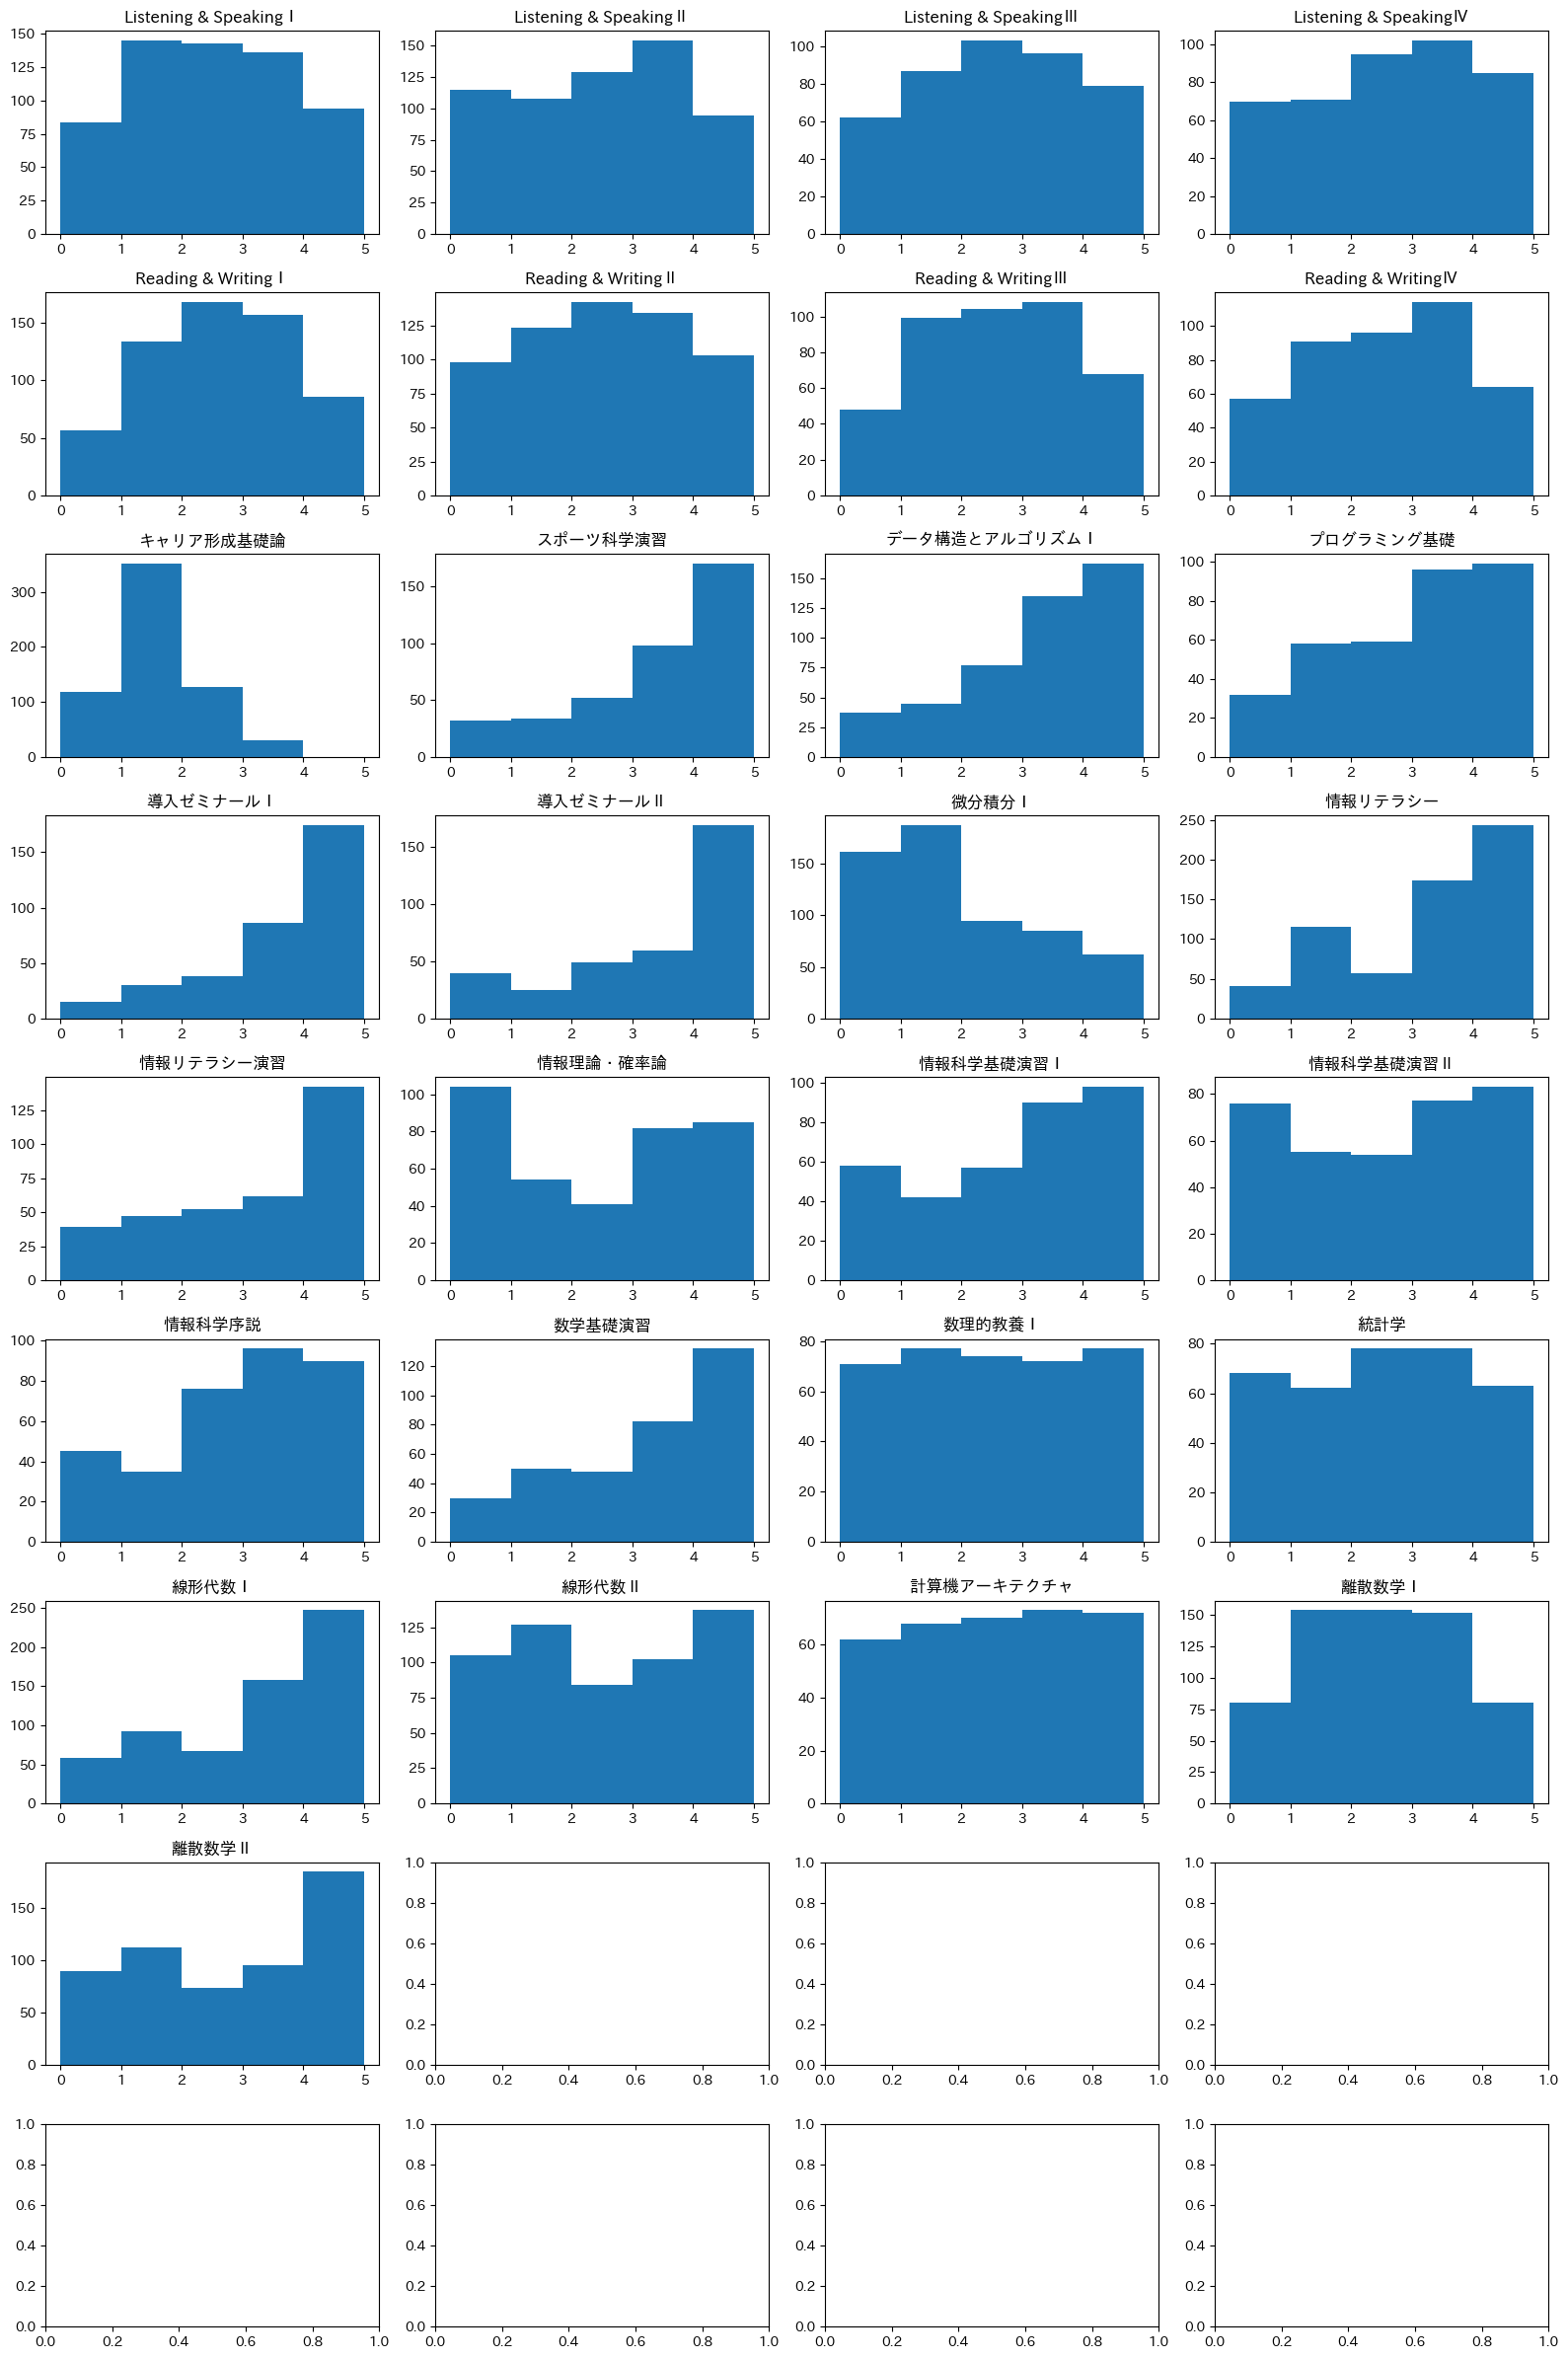

In [21]:
# グラフの表示を設定
fig, ax = plt.subplots(9, 4, figsize=(16, 24))

# ヒストグラムの描写
for i, col in enumerate(subject_data_50):
  ax[i // 4, i % 4].hist(subject_data_50[col], bins=5, range=(0, 5)) #グラフ
  ax[i // 4, i % 4].set_title(col) # タイトル

plt.tight_layout()
plt.show()

### ヒートマップ

<Axes: xlabel='科目名', ylabel='科目名'>

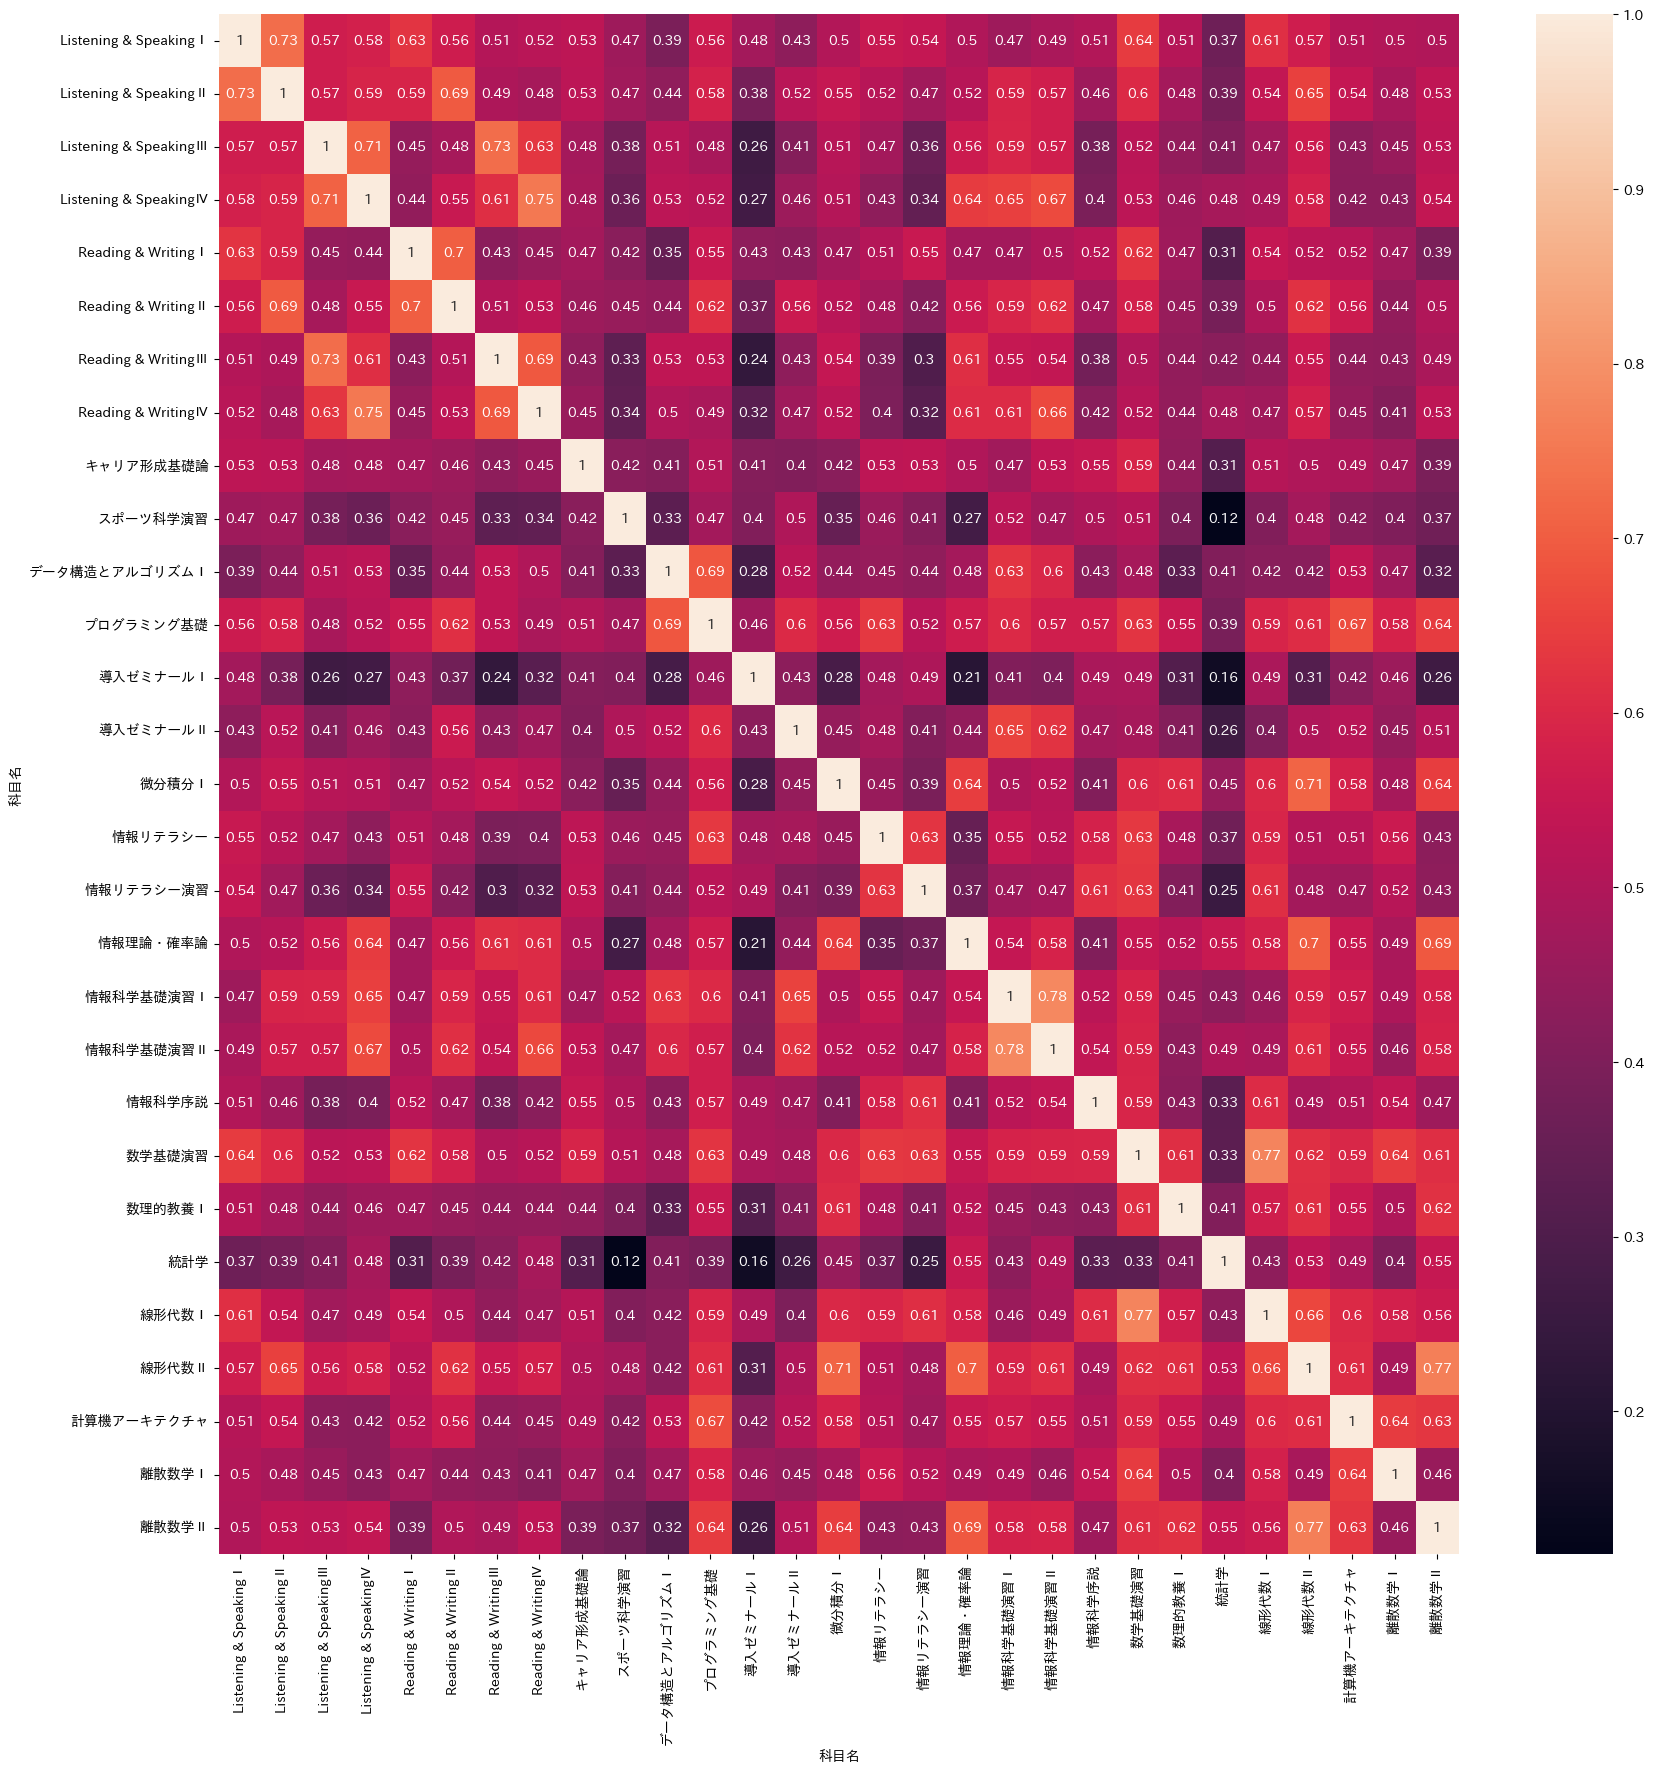

In [22]:
subject_data_corr = subject_data_50.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(subject_data_corr, annot = True)

# 機械学習(履修者50%以上)

In [23]:
print(subject_data_50.columns)

Index(['Listening & SpeakingⅠ', 'Listening & SpeakingⅡ',
       'Listening & SpeakingⅢ', 'Listening & SpeakingⅣ', 'Reading & WritingⅠ',
       'Reading & WritingⅡ', 'Reading & WritingⅢ', 'Reading & WritingⅣ',
       'キャリア形成基礎論', 'スポーツ科学演習', 'データ構造とアルゴリズムⅠ', 'プログラミング基礎', '導入ゼミナールⅠ',
       '導入ゼミナールⅡ', '微分積分Ⅰ', '情報リテラシー', '情報リテラシー演習', '情報理論・確率論', '情報科学基礎演習Ⅰ',
       '情報科学基礎演習Ⅱ', '情報科学序説', '数学基礎演習', '数理的教養Ⅰ', '統計学', '線形代数Ⅰ', '線形代数Ⅱ',
       '計算機アーキテクチャ', '離散数学Ⅰ', '離散数学Ⅱ'],
      dtype='object', name='科目名')


## 英語系科目


### 欠損値を含む行を削除

In [24]:
# 英語系科目を取り出す
subject_english = subject_data_50.loc[:, ['Listening & SpeakingⅠ', 'Listening & SpeakingⅡ',
       'Listening & SpeakingⅢ', 'Listening & SpeakingⅣ', 'Reading & WritingⅠ',
       'Reading & WritingⅡ', 'Reading & WritingⅢ', 'Reading & WritingⅣ']].copy()
subject_english

科目名,Listening & SpeakingⅠ,Listening & SpeakingⅡ,Listening & SpeakingⅢ,Listening & SpeakingⅣ,Reading & WritingⅠ,Reading & WritingⅡ,Reading & WritingⅢ,Reading & WritingⅣ
学生番号,,,,,,,,
15001,3.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0
15002,1.0,1.0,1.0,0.5,1.0,1.0,1.0,2.0
15003,1.0,3.0,1.0,2.0,4.0,4.0,1.0,2.0
15004,2.0,3.0,NaN,NaN,3.0,3.0,NaN,NaN
15005,3.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...
22144,1.0,1.0,NaN,NaN,1.0,0.0,NaN,NaN
22145,0.0,0.0,NaN,NaN,1.0,0.0,NaN,NaN
22146,3.0,1.0,NaN,NaN,2.0,0.0,NaN,NaN


### 欠損値の確認・削除

In [25]:
subject_english.isna().sum()

科目名
Listening & SpeakingⅠ     35
Listening & SpeakingⅡ     37
Listening & SpeakingⅢ    210
Listening & SpeakingⅣ    214
Reading & WritingⅠ        35
Reading & WritingⅡ        37
Reading & WritingⅢ       210
Reading & WritingⅣ       215
dtype: int64

In [26]:
subject_english =  subject_english.dropna(how = "any")
subject_english

科目名,Listening & SpeakingⅠ,Listening & SpeakingⅡ,Listening & SpeakingⅢ,Listening & SpeakingⅣ,Reading & WritingⅠ,Reading & WritingⅡ,Reading & WritingⅢ,Reading & WritingⅣ
学生番号,,,,,,,,
15001,3.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0
15002,1.0,1.0,1.0,0.5,1.0,1.0,1.0,2.0
15003,1.0,3.0,1.0,2.0,4.0,4.0,1.0,2.0
15005,3.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0
15006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
21132,3.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0
21133,3.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0
21136,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0


### 相関の確認

In [27]:
subject_english.corr()

科目名,Listening & SpeakingⅠ,Listening & SpeakingⅡ,Listening & SpeakingⅢ,Listening & SpeakingⅣ,Reading & WritingⅠ,Reading & WritingⅡ,Reading & WritingⅢ,Reading & WritingⅣ
科目名,,,,,,,,
Listening & SpeakingⅠ,1.000000,0.729236,0.564269,0.576144,0.566542,0.509912,0.520025,0.524656
Listening & SpeakingⅡ,0.729236,1.000000,0.561714,0.590515,0.513134,0.614702,0.487516,0.487385
Listening & SpeakingⅢ,0.564269,0.561714,1.000000,0.723103,0.443822,0.480004,0.726169,0.633649
Listening & SpeakingⅣ,0.576144,0.590515,0.723103,1.000000,0.437698,0.546045,0.614794,0.752641
Reading & WritingⅠ,0.566542,0.513134,0.443822,0.437698,1.000000,0.667500,0.425431,0.456992
Reading & WritingⅡ,0.509912,0.614702,0.480004,0.546045,0.667500,1.000000,0.505907,0.531039
Reading & WritingⅢ,0.520025,0.487516,0.726169,0.614794,0.425431,0.505907,1.000000,0.691919
Reading & WritingⅣ,0.524656,0.487385,0.633649,0.752641,0.456992,0.531039,0.691919,1.000000


### 重回帰分析

In [28]:
# 説明変数と目的変数
X = subject_english.drop(["Listening & SpeakingⅣ", "Listening & SpeakingⅡ"], axis = 1)
y = subject_english["Listening & SpeakingⅣ"].values

# 訓練データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

# モデルの初期化と学習
model = LinearRegression()
model.fit(X_train, y_train)

# 決定係数の表示
print("決定係数(train):{:.5f}".format(model.score(X_train, y_train)))
print("決定係数(test):{:.5f}".format(model.score(X_test, y_test)))

# 回帰係数と切片
print("\n回帰係数\n{}".format(pd.Series(model.coef_, index = X.columns)))
print("切片:{:.5f}".format(model.intercept_))

決定係数(train):0.68499
決定係数(test):0.69532

回帰係数
科目名
Listening & SpeakingⅠ    0.135994
Listening & SpeakingⅢ    0.392404
Reading & WritingⅠ      -0.109048
Reading & WritingⅡ       0.164597
Reading & WritingⅢ      -0.101155
Reading & WritingⅣ       0.478934
dtype: float64
切片:0.15830


## 数学系科目

### 欠損値を含む行を削除

In [29]:
# 線形代数を取り出す
subject_math = subject_data.loc[:, ["線形代数Ⅰ", "線形代数Ⅱ", "離散数学Ⅰ", "離散数学Ⅱ", "微分積分Ⅰ",
                                    "統計学", "数理的教養Ⅰ"]].copy()
subject_math

科目名,線形代数Ⅰ,線形代数Ⅱ,離散数学Ⅰ,離散数学Ⅱ,微分積分Ⅰ,統計学,数理的教養Ⅰ
学生番号,,,,,,,
15001,4.0,4.0,4.0,4.0,4.0,3.0,2.0
15002,1.0,0.0,2.0,2.0,0.0,0.0,1.0
15003,2.0,2.0,2.0,2.0,1.0,3.0,1.0
15004,4.0,3.0,4.0,3.0,2.0,3.0,3.0
15005,3.0,2.0,4.0,3.0,2.0,3.0,4.0
...,...,...,...,...,...,...,...
22144,0.0,NaN,1.0,3.0,0.0,NaN,NaN
22145,1.0,0.0,0.0,0.0,0.0,NaN,NaN
22146,3.0,2.0,2.0,2.0,1.0,NaN,NaN


### 欠損値の確認・削除

In [30]:
subject_math.isna().sum()

科目名
線形代数Ⅰ      15
線形代数Ⅱ      82
離散数学Ⅰ      17
離散数学Ⅱ      79
微分積分Ⅰ      47
統計学       288
数理的教養Ⅰ    266
dtype: int64

In [31]:
subject_math =  subject_math.dropna(how = "any")
subject_math

科目名,線形代数Ⅰ,線形代数Ⅱ,離散数学Ⅰ,離散数学Ⅱ,微分積分Ⅰ,統計学,数理的教養Ⅰ
学生番号,,,,,,,
15001,4.0,4.0,4.0,4.0,4.0,3.0,2.0
15002,1.0,0.0,2.0,2.0,0.0,0.0,1.0
15003,2.0,2.0,2.0,2.0,1.0,3.0,1.0
15004,4.0,3.0,4.0,3.0,2.0,3.0,3.0
15005,3.0,2.0,4.0,3.0,2.0,3.0,4.0
...,...,...,...,...,...,...,...
21126,3.0,3.0,2.0,4.0,3.0,4.0,4.0
21127,3.0,2.0,2.0,4.0,1.0,3.0,1.0
21130,3.0,4.0,3.0,4.0,1.0,4.0,4.0


### 相関の確認

In [32]:
subject_math.corr()

科目名,線形代数Ⅰ,線形代数Ⅱ,離散数学Ⅰ,離散数学Ⅱ,微分積分Ⅰ,統計学,数理的教養Ⅰ
科目名,,,,,,,
線形代数Ⅰ,1.000000,0.555288,0.488864,0.552413,0.516902,0.344707,0.440876
線形代数Ⅱ,0.555288,1.000000,0.469975,0.790109,0.653692,0.503452,0.560793
離散数学Ⅰ,0.488864,0.469975,1.000000,0.406990,0.410298,0.347863,0.349014
離散数学Ⅱ,0.552413,0.790109,0.406990,1.000000,0.671609,0.517642,0.603018
微分積分Ⅰ,0.516902,0.653692,0.410298,0.671609,1.000000,0.422377,0.583560
統計学,0.344707,0.503452,0.347863,0.517642,0.422377,1.000000,0.356519
数理的教養Ⅰ,0.440876,0.560793,0.349014,0.603018,0.583560,0.356519,1.000000


### 重回帰分析

In [33]:
# 説明変数と目的変数
X = subject_math.drop(["線形代数Ⅱ"], axis = 1)
y = subject_math["線形代数Ⅱ"].values

# 訓練データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

# モデルの初期化と学習
model = LinearRegression()
model.fit(X_train, y_train)

# 決定係数の表示
print("決定係数(train):{:.5f}".format(model.score(X_train, y_train)))
print("決定係数(test):{:.5f}".format(model.score(X_test, y_test)))

# 回帰係数と切片
print("\n回帰係数\n{}".format(pd.Series(model.coef_, index = X.columns)))
print("切片:{:.5f}".format(model.intercept_))

決定係数(train):0.67878
決定係数(test):0.69000

回帰係数
科目名
線形代数Ⅰ     0.088287
離散数学Ⅰ     0.113305
離散数学Ⅱ     0.529417
微分積分Ⅰ     0.161678
統計学       0.096417
数理的教養Ⅰ    0.047984
dtype: float64
切片:-0.08249


## プログラミング系科目


### 欠損値を含む行を削除

In [34]:
# プログラミング系科目を取り出す
subject_programing = subject_data.loc[:, ["データ構造とアルゴリズムⅠ", "データ構造とアルゴリズムⅡ","プログラミング基礎"]].copy()
subject_programing

科目名,データ構造とアルゴリズムⅠ,データ構造とアルゴリズムⅡ,プログラミング基礎
学生番号,,,
15001,4.0,4.0,3.0
15002,2.0,1.0,1.0
15003,3.0,2.0,2.0
15004,4.0,4.0,3.0
15005,4.0,3.0,2.0
...,...,...,...
22144,NaN,NaN,NaN
22145,NaN,NaN,NaN
22146,NaN,NaN,NaN


### 欠損値の確認・削除

In [35]:
subject_programing.isna().sum()

科目名
データ構造とアルゴリズムⅠ    181
データ構造とアルゴリズムⅡ    330
プログラミング基礎        293
dtype: int64

In [36]:
subject_programing =  subject_programing.dropna(how = "any")
subject_programing

科目名,データ構造とアルゴリズムⅠ,データ構造とアルゴリズムⅡ,プログラミング基礎
学生番号,,,
15001,4.0,4.0,3.0
15002,2.0,1.0,1.0
15003,3.0,2.0,2.0
15004,4.0,4.0,3.0
15005,4.0,3.0,2.0
...,...,...,...
16157,0.0,0.0,1.0
16158,0.0,1.0,1.0
16161,0.0,0.0,0.0


### 相関の確認

In [37]:
subject_programing.corr()

科目名,データ構造とアルゴリズムⅠ,データ構造とアルゴリズムⅡ,プログラミング基礎
科目名,,,
データ構造とアルゴリズムⅠ,1.000000,0.694736,0.683261
データ構造とアルゴリズムⅡ,0.694736,1.000000,0.626947
プログラミング基礎,0.683261,0.626947,1.000000


### 重回帰分析

In [38]:
# 説明変数と目的変数
X = subject_programing.drop(["データ構造とアルゴリズムⅡ"], axis = 1)
y = subject_programing["データ構造とアルゴリズムⅡ"].values

# 訓練データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# モデルの初期化と学習
model = LinearRegression()
model.fit(X_train, y_train)

# 決定係数の表示
print("決定係数(train):{:.5f}".format(model.score(X_train, y_train)))
print("決定係数(test):{:.5f}".format(model.score(X_test, y_test)))

# 回帰係数と切片
print("\n回帰係数\n{}".format(pd.Series(model.coef_, index = X.columns)))
print("切片:{:.5f}".format(model.intercept_))

決定係数(train):0.55873
決定係数(test):0.38426

回帰係数
科目名
データ構造とアルゴリズムⅠ    0.459248
プログラミング基礎        0.334364
dtype: float64
切片:-0.08245


# 科目別の成績データ


## 科目の種類によって分ける

In [50]:
# 使用する科目
subject_data_major = subject_data.loc[:, [
    "Webプログラミング演習", "オブジェクト指向設計", "オペレーティングシステム", "キャリア形成基礎論", "キャリア形成戦略",
    "グラフィックスプログラミング演習", "ゲームプログラミング演習", "コンピュータネットワーク", "スポーツ科学演習",
    "データベース", "データ構造とアルゴリズムⅠ", "データ構造とアルゴリズムⅡ", "交通システム論",
    "初等幾何学", "実用国語Ⅰ（文章力）", "実用国語Ⅱ（国語力）", "微分方程式", "微分積分Ⅰ", "微分積分Ⅱ", "情報セキュリティ",
    "情報と職業", "情報リテラシー", "情報リテラシー演習", "数理的教養Ⅰ", "数理的教養Ⅱ", "日本語表現法", "知能情報システム論",
    "統計学", "線形代数Ⅰ", "線形代数Ⅱ", "離散数学Ⅰ", "離散数学Ⅱ", "クラウドプログラミング演習", "コンピュータグラフィックス基礎",
    "データ構造とアルゴリズムⅠ演習", "ハードウェア実験Ⅰ", "ハードウェア設計Ⅰ", "ハードウェア設計Ⅱ", "プログラミング入門",
    "プログラミング基礎Ⅰ", "プログラミング基礎Ⅱ", "プログラミング言語とコンパイラ", "モバイルプログラミング演習",
    "基礎ゼミナール", "基礎数学", "基礎物理", "情報科学基礎演習", "技術者倫理", "機械工学概論", "確率統計", "組込みソフトウェア演習",
    "解析幾何学", "計算機構成論Ⅰ", "計算機構成論Ⅱ", "離散数学Ⅲ", "離散数学Ⅳ", "電気工学概論", "ＡＩプログラミング演習",
    ]].copy()

In [51]:
print(subject_data_major.columns)

Index(['Webプログラミング演習', 'オブジェクト指向設計', 'オペレーティングシステム', 'キャリア形成基礎論', 'キャリア形成戦略',
       'グラフィックスプログラミング演習', 'ゲームプログラミング演習', 'コンピュータネットワーク', 'スポーツ科学演習',
       'データベース', 'データ構造とアルゴリズムⅠ', 'データ構造とアルゴリズムⅡ', '交通システム論', '初等幾何学',
       '実用国語Ⅰ（文章力）', '実用国語Ⅱ（国語力）', '微分方程式', '微分積分Ⅰ', '微分積分Ⅱ', '情報セキュリティ',
       '情報と職業', '情報リテラシー', '情報リテラシー演習', '数理的教養Ⅰ', '数理的教養Ⅱ', '日本語表現法',
       '知能情報システム論', '統計学', '線形代数Ⅰ', '線形代数Ⅱ', '離散数学Ⅰ', '離散数学Ⅱ', 'クラウドプログラミング演習',
       'コンピュータグラフィックス基礎', 'データ構造とアルゴリズムⅠ演習', 'ハードウェア実験Ⅰ', 'ハードウェア設計Ⅰ',
       'ハードウェア設計Ⅱ', 'プログラミング入門', 'プログラミング基礎Ⅰ', 'プログラミング基礎Ⅱ', 'プログラミング言語とコンパイラ',
       'モバイルプログラミング演習', '基礎ゼミナール', '基礎数学', '基礎物理', '情報科学基礎演習', '技術者倫理',
       '機械工学概論', '確率統計', '組込みソフトウェア演習', '解析幾何学', '計算機構成論Ⅰ', '計算機構成論Ⅱ', '離散数学Ⅲ',
       '離散数学Ⅳ', '電気工学概論', 'ＡＩプログラミング演習'],
      dtype='object', name='科目名')


In [52]:
# 使用するデータを保存
subject_data.to_csv('/content/drive/MyDrive/Colab Notebooks/卒論/成績データ/データフレーム/使用する科目名.csv')

# プログラミング系科目

In [56]:
# 使用する科目
data_programing = subject_data_major[[
    "Webプログラミング演習", "オブジェクト指向設計", "グラフィックスプログラミング演習", "ゲームプログラミング演習",
    "データ構造とアルゴリズムⅠ", "データ構造とアルゴリズムⅡ", "データ構造とアルゴリズムⅠ演習",
    "プログラミング入門", "プログラミング基礎Ⅰ", "プログラミング基礎Ⅱ", "モバイルプログラミング演習", "ＡＩプログラミング演習"
    ]].copy()
data_programing

科目名,Webプログラミング演習,オブジェクト指向設計,グラフィックスプログラミング演習,ゲームプログラミング演習,データ構造とアルゴリズムⅠ,データ構造とアルゴリズムⅡ,データ構造とアルゴリズムⅠ演習,プログラミング入門,プログラミング基礎Ⅰ,プログラミング基礎Ⅱ,モバイルプログラミング演習,ＡＩプログラミング演習
学生番号,,,,,,,,,,,,
15001,NaN,3.0,4.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
15002,2.0,0.0,3.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
15003,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
15004,NaN,1.0,3.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
15005,NaN,1.0,NaN,2.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
22144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,1.0,NaN
22145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,1.0,NaN
22146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,3.0,NaN


In [57]:
# 欠損値の確認
data_programing.isna().sum()

科目名
Webプログラミング演習        424
オブジェクト指向設計          391
グラフィックスプログラミング演習    465
ゲームプログラミング演習        483
データ構造とアルゴリズムⅠ       181
データ構造とアルゴリズムⅡ       330
データ構造とアルゴリズムⅠ演習     505
プログラミング入門           349
プログラミング基礎Ⅰ          350
プログラミング基礎Ⅱ          498
モバイルプログラミング演習       350
ＡＩプログラミング演習         506
dtype: int64

In [ ]:
# 相関の確認
data_programing.corr()

## 欠損値を削除・補完する

In [89]:
# ペアワイズ削除を行う
data_programing_required1 = data_programing[[
    "プログラミング入門", "プログラミング基礎Ⅰ", "プログラミング基礎Ⅱ", "データ構造とアルゴリズムⅠ", "データ構造とアルゴリズムⅠ演習",
    "ＡＩプログラミング演習", "モバイルプログラミング演習"]].dropna()
data_programing_required1

科目名,プログラミング入門,プログラミング基礎Ⅰ,プログラミング基礎Ⅱ,データ構造とアルゴリズムⅠ,データ構造とアルゴリズムⅠ演習,ＡＩプログラミング演習,モバイルプログラミング演習
学生番号,,,,,,,
21001,4.0,4.0,4.0,4.0,4.0,4.0,3.0
21002,3.0,3.0,3.0,3.0,4.0,2.0,2.0
21003,4.0,4.0,3.0,3.0,4.0,2.0,4.0
21004,4.0,4.0,4.0,2.0,4.0,3.0,4.0
21005,4.0,4.0,4.0,4.0,4.0,2.0,3.0
...,...,...,...,...,...,...,...
21136,4.0,3.0,4.0,4.0,4.0,3.0,4.0
21137,1.0,1.0,0.0,0.0,0.0,0.0,1.0
21138,3.0,1.0,3.0,3.0,4.0,1.0,1.0


In [67]:
# 相関の確認
data_programing_required1.corr()

科目名,プログラミング入門,プログラミング基礎Ⅰ,プログラミング基礎Ⅱ,データ構造とアルゴリズムⅠ,データ構造とアルゴリズムⅠ演習,ＡＩプログラミング演習,モバイルプログラミング演習
科目名,,,,,,,
プログラミング入門,1.000000,0.569376,0.474672,0.543380,0.438466,0.587214,0.508392
プログラミング基礎Ⅰ,0.569376,1.000000,0.677426,0.714183,0.544962,0.619541,0.654504
プログラミング基礎Ⅱ,0.474672,0.677426,1.000000,0.710230,0.559285,0.569846,0.518767
データ構造とアルゴリズムⅠ,0.543380,0.714183,0.710230,1.000000,0.612249,0.669918,0.530666
データ構造とアルゴリズムⅠ演習,0.438466,0.544962,0.559285,0.612249,1.000000,0.535432,0.420230
ＡＩプログラミング演習,0.587214,0.619541,0.569846,0.669918,0.535432,1.000000,0.564807
モバイルプログラミング演習,0.508392,0.654504,0.518767,0.530666,0.420230,0.564807,1.000000


In [83]:
# 説明変数と目的変数
X = data_programing_required1.drop([
    "データ構造とアルゴリズムⅠ", "データ構造とアルゴリズムⅠ演習", "ＡＩプログラミング演習", "モバイルプログラミング演習"], axis = 1)
y = data_programing_required1["データ構造とアルゴリズムⅠ"]

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, random_state = 0)

# 重回帰分析
model = LinearRegression()
model.fit(X_train, y_train)

# 決定係数
print("決定係数(train):{:.3f}".format(model.score(X_train, y_train)))
print("決定係数(test):{:.3f}".format(model.score(X_test, y_test)))

# 回帰係数と切片
print("\n回帰係数\n{}".format(pd.Series(model.coef_, index = X.columns)))
print("切片: {:.3f}".format(model.intercept_))

決定係数(train):0.873
決定係数(test):0.411

回帰係数
科目名
プログラミング入門     0.357718
プログラミング基礎Ⅰ    0.045967
プログラミング基礎Ⅱ    0.487927
dtype: float64
切片: -0.688


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# 決定木クラス
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 3, random_state = 0)
model.fit(X_train, y_train)

print("正解率(train):{:.3f}".format(model.score(X_train, y_train)))
print("正解率(test):{:.3f}".format(model.score(X_test, y_test)))

正解率(train):0.583
正解率(test):0.576


In [90]:
# ランダムフォレストと勾配ブースティング
models = {
    "RandomForest" : RandomForestRegressor(random_state = 0),
    "GradientBoost" : GradientBoostingRegressor(random_state  = 0)
}

scores = {}

for model_name, model in models.items():
  model.fit(X_train, y_train)
  scores[(model_name, "train_score")] = model.score(X_train, y_train)
  scores[(model_name, "test_score")] = model.score(X_test, y_test)

pd.Series(scores).unstack()

,test_score,train_score
GradientBoost,0.328207,0.759551
RandomForest,0.294266,0.757831
